**Supervised Learning - Classification**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from scipy.io import arff

**Load dataset (.arff format)**

In [4]:
df = pd.read_csv('diabetes.csv')
print("Spaltennamen:", df.columns.tolist())
print(df.head())

Spaltennamen: ['preg', 'plas', 'pres', 'skin', 'insu', 'mass', 'pedi', 'age', 'class']
   preg  plas  pres  skin  insu  mass   pedi  age            class
0     6   148    72    35     0  33.6  0.627   50  tested_positive
1     1    85    66    29     0  26.6  0.351   31  tested_negative
2     8   183    64     0     0  23.3  0.672   32  tested_positive
3     1    89    66    23    94  28.1  0.167   21  tested_negative
4     0   137    40    35   168  43.1  2.288   33  tested_positive


**Zielvariable**

In [6]:
X = df.drop(columns=['class'])
y = df['class']

**Modell trainieren und auswerten**

Koeffizienten: [[ 1.22501395e-01  3.51105502e-02 -1.32989578e-02  7.80589400e-04
  -1.17380633e-03  8.96527697e-02  8.67802716e-01  1.49845953e-02]]
Intercept: [-8.36520681]
Accuracy (Training): 0.78125


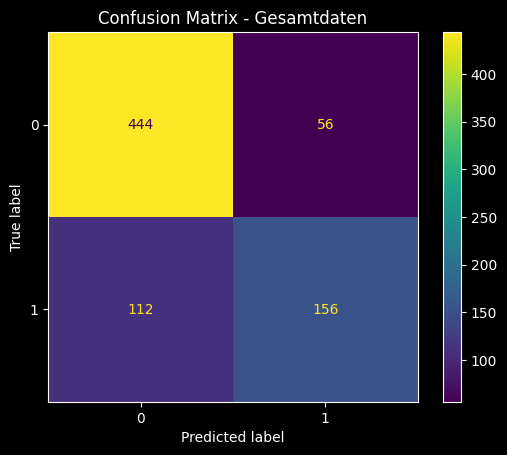

In [ ]:

model = LogisticRegression(max_iter=1000)
model.fit(X, y)


print("Koeffizienten:", model.coef_)
print("Intercept:", model.intercept_)


y_pred = model.predict(X)
print("Accuracy (Training):", accuracy_score(y, y_pred))


cm = confusion_matrix(y, y_pred)
ConfusionMatrixDisplay(cm).plot()
plt.title("Confusion Matrix - Gesamtdaten")
plt.show()


**Cross-Validation (Train/Test Split)**

Accuracy (Testdaten): 0.7467532467532467


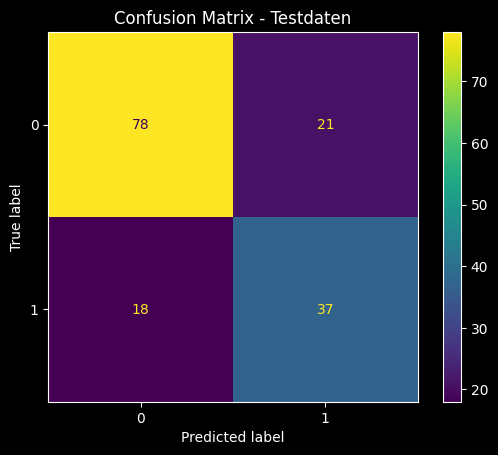

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model_cv = LogisticRegression(max_iter=1000)
model_cv.fit(X_train, y_train)

y_test_pred = model_cv.predict(X_test)
print("Accuracy (Testdaten):", accuracy_score(y_test, y_test_pred))

ConfusionMatrixDisplay(confusion_matrix(y_test, y_test_pred)).plot()
plt.title("Confusion Matrix - Testdaten")
plt.show()

78 = True Negatives (TN): Modell hat korrekt "kein Diabetes" erkannt

37 = True Positives (TP): Modell hat korrekt "Diabetes" erkannt

21 = False Positives (FP): Modell hat fälschlicherweise "Diabetes" vorhergesagt (obwohl kein Diabetes vorlag)

18 = False Negatives (FN): Modell hat "kein Diabetes" vorhergesagt, obwohl tatsächlich Diabetes vorlag
